https://plotly.com/python/bubble-maps/

# COVOD-19 daily reports of active patients in USA by states using plotly.graph_objects

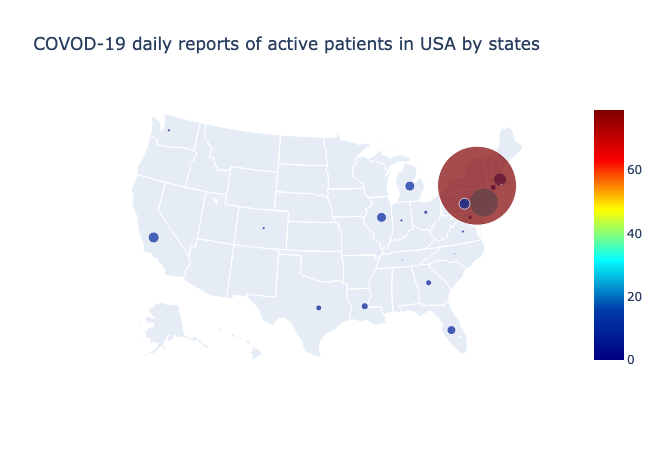

In [29]:
import plotly.graph_objects as go

import pandas as pd

daily_us_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-21-2020.csv'
df = pd.read_csv(daily_us_url)


df = df.dropna(axis=0, subset=['Lat'])
df = df.fillna(0)
df['text'] = df['Province_State'] + ': ' + df['Active'].astype(int).astype(str)
df['Active'] = df['Active']/3000
df['Active'] = df['Active'].astype(int)

fig = go.Figure(data=go.Scattergeo(
    lon=df['Long_'],
    lat=df['Lat'],
    text=df['text'],
    mode='markers',
    marker_color=df['Active'],
    marker=dict(
        size=df['Active'],
        # https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Scattergeo.html#plotly.graph_objects.scattergeo.Marker.colorscale
        colorscale='jet',
        showscale=True
    )
))

fig.update_layout(
    title='COVOD-19 daily reports of active patients in USA by states',
    geo=dict(
        scope='usa',
    ),
)
fig.show()

# COVOD-19 daily reports of active patients in USA without New York using plotly.graph_objects

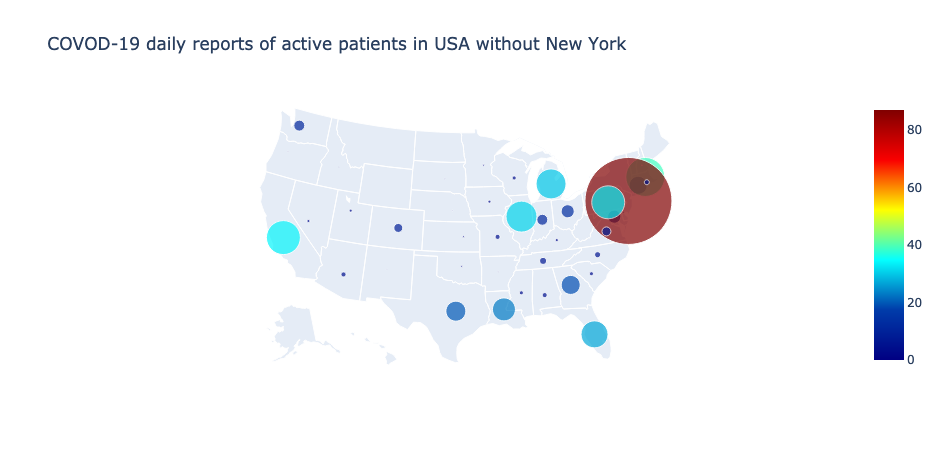

In [27]:
import plotly.graph_objects as go

import pandas as pd

daily_us_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-21-2020.csv'
df = pd.read_csv(daily_us_url)

indexNames = df[df['Province_State'] == 'New York'].index
df.drop(indexNames, inplace=True)
df = df.dropna(axis=0, subset=['Lat'])
df = df.fillna(0)
# print(indexNames)
df['text'] = df['Province_State'] + ': ' + df['Active'].astype(int).astype(str)
df['Active'] = df['Active']/1000
df['Active'] = df['Active'].astype(int)

fig = go.Figure(data=go.Scattergeo(
    lon=df['Long_'],
    lat=df['Lat'],
    text=df['text'],
    mode='markers',
    marker_color=df['Active'],
    marker=dict(
        size=df['Active'],
        colorscale='jet',
        #https://plotly.github.io/plotly.py-docs/generated/plotly.graph_objects.Scattergeo.html#plotly.graph_objects.scattergeo.Marker
        showscale=True
    )
))

fig.update_layout(
    title='COVOD-19 daily reports of active patients in USA without New York',
    geo=dict(
        scope='usa',
    ),
)
fig.show()

# COVID-19 Deaths in USA by states using Plotly express

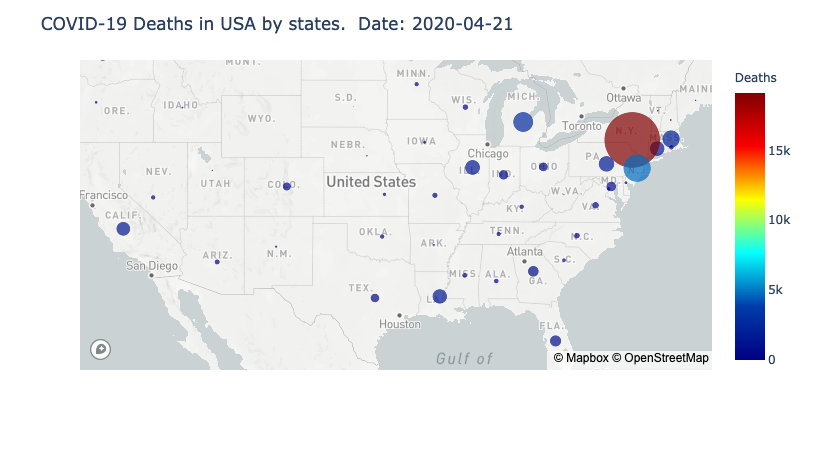

In [3]:
import plotly.express as px
import pandas as pd

daily_us_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/04-21-2020.csv'
df = pd.read_csv(daily_us_url)

df = df.dropna(axis=0, subset=['Lat'])
df = df.fillna(0)
date, time = df.iloc[0, 2].split()

px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(df, lat="Lat", lon="Long_",
                        color="Deaths",
                        size="Deaths",
                        color_continuous_scale=px.colors.sequential.Jet,
                        size_max=40,
                        zoom=3, 
                        center={"lat": 37.0902, "lon": -95.7129},              
                        hover_data=["Confirmed"],
                        hover_name='Province_State'
                       )
fig.update_layout(
    title=f'COVID-19 Deaths in USA by states.  Date: {date}',
    #     autosize=True,
    #     hovermode='closest',
    #     showlegend=False,
    #     mapbox=dict(
    #         accesstoken=mapbox_access_token,
    #         bearing=0,
    #         center=dict(
    #             lat=38,
    #             lon=-94
    #         ),
    #         pitch=0,
    #         zoom=3,
    #         style='light'
    #     ),
)
fig.show()

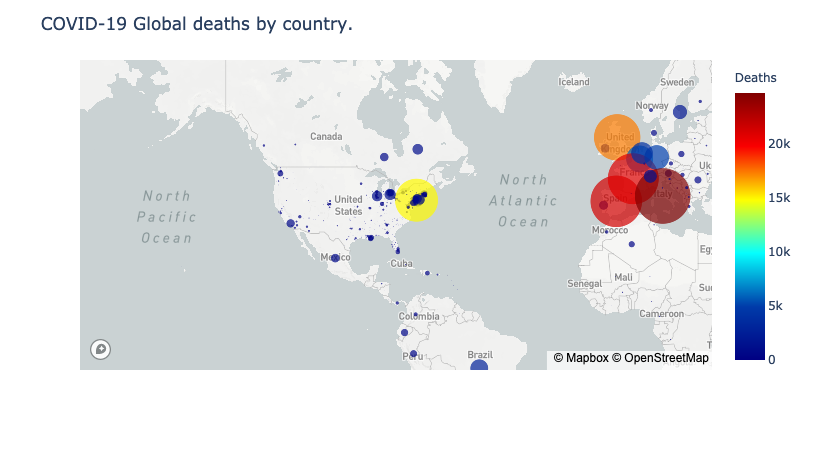

In [4]:
import plotly.express as px
# df = px.data.gapminder().query("year==2007")
daily_global_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-21-2020.csv'
df = pd.read_csv(daily_global_url)

fig = px.scatter_mapbox(df,  
                        lat="Lat", 
                        lon="Long_",     
                        color="Deaths", 
                        size="Deaths",
                        color_continuous_scale=px.colors.sequential.Jet, 
                        size_max=40, 
                        zoom=1,                 
                        hover_data=["Confirmed"],
                        hover_name='Country_Region'
                       )
fig.update_layout(
    title=f'COVID-19 Global deaths by country.',
)
fig.show()


# Data scraping

## Daily report USA

In [21]:
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import pandas as pd

github = 'https://github.com'
URL = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports_us'

page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
# find the latest report
latest = str(soup.table.find_all('a')[-4]['href'])
# print(latest)
# go to the latest report page
latestURL = github + latest
latestPage = requests.get(latestURL, 'html.parser')
# print(latestURL)
# find the raw page url
soup = BeautifulSoup(latestPage.content, 'html.parser')
raw = str(soup.find(id='raw-url')['href'])
rawURL = github + raw
# print(rawURL)
df = pd.read_csv(rawURL)
# display(df.head(5))
df = df.dropna(axis=0, subset=['Lat'])
# display(df.head(5))
df = df.fillna(0)
# display(df.head())
date, time = df.iloc[0, 2].split()


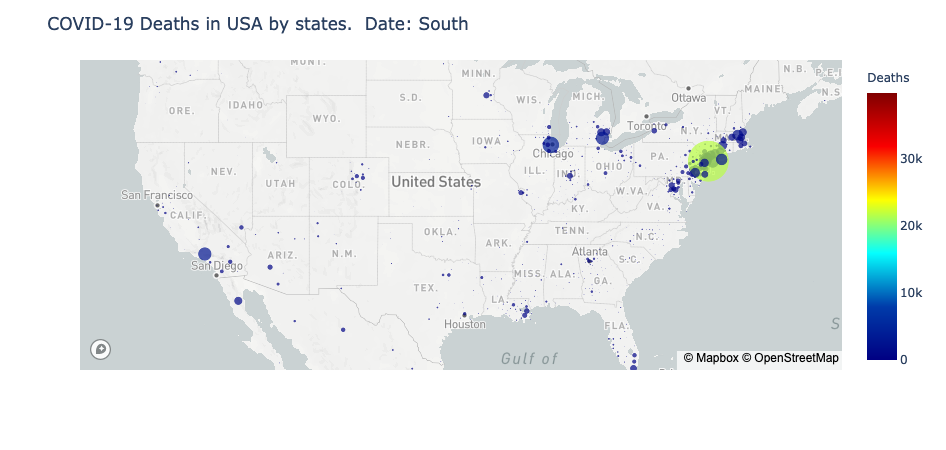

In [25]:


px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(df, lat="Lat", lon="Long_",
                        color="Deaths",
                        size="Deaths",
                        color_continuous_scale=px.colors.sequential.Jet,
                        size_max=40,
                        zoom=3, 
                        center={"lat": 37.0902, "lon": -95.7129},              
                        hover_data=["Confirmed"],
                        hover_name='Province_State'
                       )
fig.update_layout(
    title=f'COVID-19 Deaths in USA by states.  Date: {date}',
)
fig.show()

# World

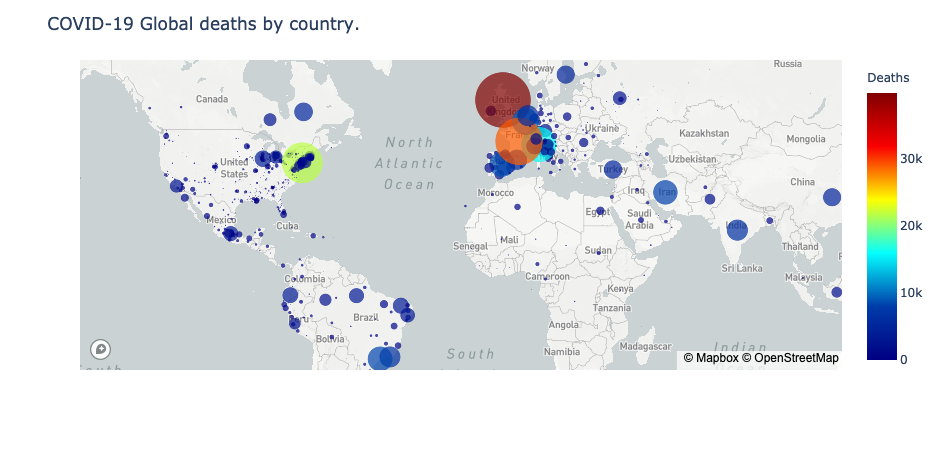

In [24]:
import requests
from bs4 import BeautifulSoup
import plotly.express as px
import pandas as pd

github = 'https://github.com'
URL = 'https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports'

page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html.parser')
# find the latest report
latest = str(soup.table.find_all('a')[-4]['href'])
# print(latest)
# go to the latest report page
latestURL = github + latest
latestPage = requests.get(latestURL, 'html.parser')
# print(latestURL)
# find the raw page url
soup = BeautifulSoup(latestPage.content, 'html.parser')
raw = str(soup.find(id='raw-url')['href'])
rawURL = github + raw
# print(rawURL)
df = pd.read_csv(rawURL)
# print(df.head(20))
df = df.dropna(axis=0, subset=['Lat'])
df = df.fillna(0)
# display(df.head())
date, time = df.iloc[0, 2].split()

px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(df,  
                        lat="Lat", 
                        lon="Long_",     
                        color="Deaths", 
                        size="Deaths",
                        color_continuous_scale=px.colors.sequential.Jet, 
                        size_max=40, 
                        zoom=1,    
                        center={"lat": 25.482951, "lon": -18.189093},  
                        hover_data=["Confirmed"],
                        hover_name='Country_Region'
                       )
fig.update_layout(
    title=f'COVID-19 Global deaths by country.',
)
fig.show()